In [2]:
"""
Created on Tue Nov 16 15:47:30 2021
Modified on Wed May 3          2023

@author: Mohammad Bahrami

Safe Autonomous Systems Lab (SAS Lab)
Stevens Institute of Technology

"""

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import math 
from scipy.io import loadmat, savemat

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [3]:
plt.style.use('default')

In [5]:
# parameters

# target points for the formation 
Xstar = np.array([[-1, -0.5, 0, 0.5, 1]]).T
Ystar = np.array([[1.4, 0.7, 0, 0.7, 1.4]]).T


# sample time
Ts = .02 

itr_hover = 500+2
duration_itr = 700
itr_landing = itr_hover+duration_itr
max_itr = itr_hover + duration_itr + 250

# N = len(pos_vel.T)
N = max_itr
T = np.linspace(0, N-1, N)*Ts # time span



# plt.style.use('dark_background')
# plt.style.use('default')

# FIGURE_SIZE = (7,3.6)
FIGURE_SIZE = (7,2.6)
# BIG_FONT_SIZE = 24
FONT_SIZE = 12

# !sudo apt-get install fonts-cmu
mpl.rcParams['text.usetex'] = False #True
# mpl.rcParams['font.family'] = "sans-serif" 
# mpl.rcParams['font.sans-serif'] = "Computer Modern Sans Serif"
# mpl.rcParams['font.family'] = "serif" 
# mpl.rcParams['font.serif'] = "Computer Modern Roman"
mpl.rcParams["figure.figsize"] = FIGURE_SIZE
mpl.rcParams["axes.labelsize"] = FONT_SIZE
# mpl.rcParams["xtick.labelsize"] = FONT_SIZE-1
# mpl.rcParams["ytick.labelsize"] = FONT_SIZE-1
# mpl.rcParams["legend.fontsize"] = 10

# mpl.style.use('default')

print('available plot styles: \n',plt.matplotlib.style.available)


pos_dim = 15 #  NumOfAgents * 3

SAVE_PLOT = False #True

available plot styles: 
 ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [47]:
# load data

idxx  ='adversary_free'
# idxx  ='adversary_free_long'
# idxx  ='ZDA'
# idxx  = 'covert_ramp'

with open("{}/X_{}.npy".format(idxx,idxx), 'rb') as loaddata:
    pos_vel = np.load(loaddata)


cmd = np.load('{}/ctrl_cmd_{}.npy'.format(idxx,idxx))
rot = np.load('{}/orien_{}.npy'.format(idxx,idxx))


with open("{}/CentObs_{}.npy".format(idxx,idxx), 'rb') as loaddata:
    Xhat_CentObs_x = np.load(loaddata)
    Yhat_CentObs_x = np.load(loaddata)
    res_CentObs_x = np.load(loaddata)
    Xhat_CentObs_y = np.load(loaddata)
    Yhat_CentObs_y = np.load(loaddata)
    res_CentObs_y = np.load(loaddata)


with open("{}/localObs_{}.npy".format(idxx,idxx), 'rb') as loaddata:
    Xhat_locObs_1_x = np.load(loaddata)
    Yhat_locObs_1_x = np.load(loaddata)
    res_locObs_1_x = np.load(loaddata)
    Xhat_locObs_1_y = np.load(loaddata)
    Yhat_locObs_1_y = np.load(loaddata)
    res_locObs_1_y = np.load(loaddata)
    Xhat_locObs_3_x = np.load(loaddata)
    Yhat_locObs_3_x = np.load(loaddata)
    res_locObs_3_x = np.load(loaddata)
    Xhat_locObs_3_y = np.load(loaddata)
    Yhat_locObs_3_y = np.load(loaddata)
    res_locObs_3_y = np.load(loaddata)
    
    #   

In [28]:
def PlotXYplane(pos_vel_data, itr_end=itr_landing):
#     itr_landing = itr_end 
    plt.plot(pos_vel[0,itr_hover:itr_end],pos_vel[1,itr_hover:itr_end], label=r'UAV 1')
    plt.plot(pos_vel[3,itr_hover:itr_end],pos_vel[4,itr_hover:itr_end], label=r'UAV 2')
    plt.plot(pos_vel[6,itr_hover:itr_end],pos_vel[7,itr_hover:itr_end], label=r'UAV 3')
    plt.plot(pos_vel[9,itr_hover:itr_end],pos_vel[10,itr_hover:itr_end], label=r'UAV 4')
    plt.plot(pos_vel[12,itr_hover:itr_end],pos_vel[13,itr_hover:itr_end], label=r'UAV 5')
    #
    plt.plot(pos_vel[0,itr_hover],pos_vel[1,itr_hover], marker = 'x', color='blue')
    plt.plot(pos_vel[3,itr_hover],pos_vel[4,itr_hover], marker = 'x', color='orange')
    plt.plot(pos_vel[6,itr_hover],pos_vel[7,itr_hover], marker = 'x', color='green')
    plt.plot(pos_vel[9,itr_hover],pos_vel[10,itr_hover], marker = 'x', color='red')
    plt.plot(pos_vel[12,itr_hover],pos_vel[13,itr_hover], marker = 'x', color='purple')
    #
    plt.plot(pos_vel[0,itr_end],pos_vel[1,itr_end], marker = 'o', color='blue')
    plt.plot(pos_vel[3,itr_end],pos_vel[4,itr_end], marker = 'o', color='orange')
    plt.plot(pos_vel[6,itr_end],pos_vel[7,itr_end], marker = 'o', color='green')
    plt.plot(pos_vel[9,itr_end],pos_vel[10,itr_end], marker = 'o', color='red')
    plt.plot(pos_vel[12,itr_end],pos_vel[13,itr_end], marker = 'o', color='purple')
    #
    plt.ylim([-.5, 2])
    plt.xlim([-1.5, 1.5])
    plt.xlabel('$x$-position [m]')
    plt.ylabel('$y$-position [m]')
    plt.legend()
    if SAVE_PLOT == True:
        plt.savefig('{}/{}_position_XY_plane.pdf'.format(idxx,idxx), bbox_inches="tight")
    
    
# Position and Velocity in x-axis OR y-axis 
def PlotPosVel(pos_vel_data, FigSize,  idx=0 , t_start = itr_hover, t_end = itr_landing):
    """
    idx  = 0 plots in X axis
    idx  = 1 plots in Y axis
    """
 
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = FigSize)
    if idx == 0:
        fig.suptitle(r'$x$-axis Position and Velocity', y= 1.04)
    else:
        fig.suptitle(r'$y$-axis Position and Velocity', y= 1.04)
     
    if idx == 0:
        Pstar = Xstar
    else:
        Pstar = Ystar
        
#     ax1.axhline(y = (Pstar[0,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k', label=r'$p^{*}$') 
#     ax1.axhline(y = (Pstar[1,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k') 
#     ax1.axhline(y = (Pstar[2,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k')
#     ax1.axhline(y = (Pstar[3,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k')
#     ax1.axhline(y = (Pstar[4,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k')
    
    ax1.plot(T[t_start:t_end]-t_start*Ts,pos_vel[0+idx,t_start:t_end], label=r'UAV 1')
    ax1.plot(T[t_start:t_end]-t_start*Ts,pos_vel[3+idx,t_start:t_end], label=r'UAV 2')
    ax1.plot(T[t_start:t_end]-t_start*Ts,pos_vel[6+idx,t_start:t_end], label=r'UAV 3')
    ax1.plot(T[t_start:t_end]-t_start*Ts,pos_vel[9+idx,t_start:t_end], label=r'UAV 4')
    ax1.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12+idx,t_start:t_end], label=r'UAV 5')
    #
    ax1.legend(bbox_to_anchor=(0, 1.01, 1, 0.2) ,  ncol=5, mode='expand', loc='lower left')
    ax1.set_ylabel("Position [m]");

    ax2.plot(T[t_start:t_end]-t_start*Ts,pos_vel[0+idx+pos_dim,t_start:t_end], label=r'UAV 1\s vel.')
    ax2.plot(T[t_start:t_end]-t_start*Ts,pos_vel[3+idx+pos_dim,t_start:t_end], label=r'UAV 2\s vel.')
    ax2.plot(T[t_start:t_end]-t_start*Ts,pos_vel[6+idx+pos_dim,t_start:t_end], label=r'UAV 3\s vel.')
    ax2.plot(T[t_start:t_end]-t_start*Ts,pos_vel[9+idx+pos_dim,t_start:t_end], label=r'UAV 4\s vel.')
    ax2.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12+idx+pos_dim,t_start:t_end], label=r'UAV 5\s vel.')
    ax2.set_ylabel("Velocity [m/sec]"); ax2.set_xlabel('Time [sec]'); 
    fig.align_labels()
    
    if SAVE_PLOT == True:
        plt.savefig('{}/{}_pos_vel_{}_axis.pdf'.format(idxx,idxx, 'y' if idx == 1 else 'x'))
    
    
     
# Relative Displacement Coordination in x-axis OR y-axis 

def PlotRelDisp(pos_vel_data, FigSize,  idx=0 , t_start = itr_hover, t_end = itr_landing):   
    
    if idx == 0:
        Pstar = Xstar
    else:
        Pstar = Ystar
        
    plt.axhline(y = (Pstar[4,0]-Pstar[0,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k', label=r'${\mathrm{p}}^{*}_{ij}$') 
    plt.axhline(y = (Pstar[4,0]-Pstar[1,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k') 
    plt.axhline(y = (Pstar[4,0]-Pstar[2,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k')
    plt.axhline(y = (Pstar[4,0]-Pstar[3,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k')
    plt.axhline(y = (Pstar[0,0]-Pstar[3,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k')
    plt.axhline(y = (Pstar[0,0]-Pstar[2,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k')
    plt.axhline(y = (Pstar[1,0]-Pstar[2,0]), xmin = 2*Ts, xmax = 1-2*Ts, linestyle='--', color = 'k')

    plt.plot(T[t_start:t_end]-t_start*Ts,(pos_vel[12+idx,t_start:t_end]-pos_vel[0+idx,t_start:t_end]), label=r'$\mathrm{p}_{51}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12+idx,t_start:t_end]-pos_vel[3+idx,t_start:t_end], label=r'$\mathrm{p}_{52}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12+idx,t_start:t_end]-pos_vel[6+idx,t_start:t_end], label=r'$\mathrm{p}_{53}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12+idx,t_start:t_end]-pos_vel[9+idx,t_start:t_end], label=r'$\mathrm{p}_{54}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[0+idx,t_start:t_end]-pos_vel[9+idx,t_start:t_end], label=r'$\mathrm{p}_{14}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[0+idx,t_start:t_end]-pos_vel[6+idx,t_start:t_end], label=r'$\mathrm{p}_{13}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[3+idx,t_start:t_end]-pos_vel[6+idx,t_start:t_end], label=r'$\mathrm{p}_{23}$')
    plt.xlabel('Time [sec]')
    if idx == 0:
        plt.ylabel(r'$x$-axis Relative Positions [m]')
    else:
        plt.ylabel(r'$y$-axis Relative Positions [m]')
    #plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2),  title='Relative Position Coordination' ,edgecolor='white' ,  ncol=8, mode='expand', loc='lower left')
    plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2),  ncol=8, mode='expand', loc='lower left')
    # plt.title('Relative Displacement Coordination')
    
    if SAVE_PLOT == True:
        plt.savefig('{}/{}_relative_disp_{}_axis.pdf'.format(idxx,idxx, 'y' if idx == 1 else 'x'), bbox_inches="tight")    
    
    
# Coordination Error in x-axis OR y-axis 

def PlotCoorError(pos_vel_data, FigSize,  idx=0 , t_start = itr_hover, t_end = itr_landing):
    
    if idx == 0:
        Pstar = Xstar
    else:
        Pstar = Ystar
        
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12+idx,t_start:t_end]-pos_vel[0+idx,t_start:t_end]-(Pstar[4,0]-Pstar[0,0]), label=r'$\mathrm{\~p}_{51}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12+idx,t_start:t_end]-pos_vel[3+idx,t_start:t_end]-(Pstar[4,0]-Pstar[1,0]), label=r'$\mathrm{\~p}_{52}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12+idx,t_start:t_end]-pos_vel[6+idx,t_start:t_end]-(Pstar[4,0]-Pstar[2,0]), label=r'$\mathrm{\~p}_{53}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12+idx,t_start:t_end]-pos_vel[9+idx,t_start:t_end]-(Pstar[4,0]-Pstar[3,0]), label=r'$\mathrm{\~p}_{54}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[0+idx,t_start:t_end]-pos_vel[9+idx,t_start:t_end]-(Pstar[0,0]-Pstar[3,0]), label=r'$\mathrm{\~p}_{14}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[0+idx,t_start:t_end]-pos_vel[6+idx,t_start:t_end]-(Pstar[0,0]-Pstar[2,0]), label=r'$\mathrm{\~p}_{13}$')
    plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[3+idx,t_start:t_end]-pos_vel[6+idx,t_start:t_end]-(Pstar[1,0]-Pstar[2,0]), label=r'$\mathrm{\~p}_{23}$')
    plt.xlabel('Time [sec]')
    if idx == 0:
        plt.ylabel(r'$x$-axis Coordination Error [m]')
    else:
        plt.ylabel(r'$y$-axis Coordination Error [m]')        
    plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), ncol=7, mode='expand', loc='lower left')
    
    if SAVE_PLOT == True:
        plt.savefig('{}/{}_coord_error_{}_axis.pdf'.format(idxx,idxx, 'y' if idx == 1 else 'x'), bbox_inches="tight")    
    
# Central Observer

def PlotCentralResiduals(pos_vel_data, FigSize, idx=0, t_start = itr_hover, t_end = itr_landing):
    
    
    threshold_0 = 3*np.exp(-2.2*(T[itr_hover:t_end]-t_start*Ts)) + 0.015
    
    if idx == 0:
    
        plt.plot(T[t_start:t_end]-t_start*Ts, threshold_0, '--', color='gray', label = r'threshold $\epsilon_{0}$')
        #, 
        plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_x[0,t_start:t_end]), label = r'$|\mathrm{r}_0^{3}|$')
        plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_x[1,t_start:t_end]), label = r'$|\mathrm{r}_0^{5}|$')
        plt.ylim([-.01, .05])
        plt.xlabel('Time [sec]')
        plt.ylabel(r'$x$-axis Central Residulas [m]')
#         plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), ncol=3, mode='expand', loc='lower left')
        plt.legend(loc='upper right')
        
    else:
        plt.plot(T[t_start:t_end]-t_start*Ts, threshold_0, '--', color='gray', label = r'threshold $\epsilon_{0}$')
        #
        plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_y[0,t_start:t_end]), label = r'$|\mathrm{r}_0^{3}|$')
        plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_y[1,t_start:t_end]), label = r'$|\mathrm{r}_0^{5}|$')
        plt.ylim([-.01, .05])
        plt.xlabel('Time [sec]')
        plt.ylabel(r'$y$-axis Central Residulas [m]') 
#         plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), ncol=3, mode='expand', loc='lower left')
        plt.legend(loc='upper right')

    if SAVE_PLOT == True:
        plt.savefig('{}/{}_central_residual_{}_axis.pdf'.format(idxx,idxx, 'y' if idx == 1 else 'x'), bbox_inches="tight")  

def PlotCentralResidualsXY(pos_vel_data, FigSize, t_start = itr_hover, t_end = itr_landing, small = None):
        
            
        threshold_0 = 3*np.exp(-2.2*(T[itr_hover:t_end]-t_start*Ts)) + 0.015
        
        if small == True:
            fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize = (7,2.5))
                    
            ax1.plot(T[t_start:t_end]-t_start*Ts, threshold_0, '--', color='gray', label = r'threshold $\epsilon_{0}$')
            ax1.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_x[0,t_start:t_end]), label = r'$|\mathrm{r}_0^{3}|$')
            ax1.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_x[1,t_start:t_end]), label = r'$|\mathrm{r}_0^{5}|$')
            ax1.set_ylim([-.01, .05])
            ax1.set_ylabel(r'$x$-axis Central Residulas [m]')
            ax1.legend(loc='upper right')
            ax1.set_xlabel('Time [sec]'); 

            ax2.plot(T[t_start:t_end]-t_start*Ts, threshold_0, '--', color='gray', label = r'threshold $\epsilon_{0}$')
            ax2.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_y[0,t_start:t_end]), label = r'$|\mathrm{r}_0^{3}|$')
            ax2.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_y[1,t_start:t_end]), label = r'$|\mathrm{r}_0^{5}|$')
            ax2.set_ylim([-.01, .05]) 
            ax2.set_ylabel(r'$y$-axis Central Residulas [m]'); ax2.set_xlabel('Time [sec]'); 
            ax2.legend(loc='upper right')
            fig.align_labels()
            fig.tight_layout()

            if SAVE_PLOT == True:
                plt.savefig('{}/{}_central_residual_XY_small.pdf'.format(idxx,idxx), bbox_inches="tight")
        else:
            
            fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = FigSize)

            ax1.plot(T[t_start:t_end]-t_start*Ts, threshold_0, '--', color='gray', label = r'threshold $\epsilon_{0}$')
            ax1.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_x[0,t_start:t_end]), label = r'$|\mathrm{r}_0^{3}|$')
            ax1.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_x[1,t_start:t_end]), label = r'$|\mathrm{r}_0^{5}|$')
            ax1.set_ylim([-.01, .05])
            ax1.set_ylabel(r'$x$-axis Central Residulas [m]')
            ax1.legend(ncol=3, loc='upper right')

            ax2.plot(T[t_start:t_end]-t_start*Ts, threshold_0, '--', color='gray', label = r'threshold $\epsilon_{0}$')
            ax2.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_y[0,t_start:t_end]), label = r'$|\mathrm{r}_0^{3}|$')
            ax2.plot(T[t_start:t_end]-t_start*Ts, abs(res_CentObs_y[1,t_start:t_end]), label = r'$|\mathrm{r}_0^{5}|$')
            ax2.set_ylim([-.01, .05]) 
            ax2.set_ylabel(r'$y$-axis Central Residulas [m]'); ax2.set_xlabel('Time [sec]'); 
            ax2.legend(ncol=3, loc='upper right')
            fig.align_labels()

            if SAVE_PLOT == True:
                plt.savefig('{}/{}_central_residual_XY.pdf'.format(idxx,idxx), bbox_inches="tight")
            

## plotting functions

### Adversary-free case

In [8]:
# load data

# LoadData('adversary_free')

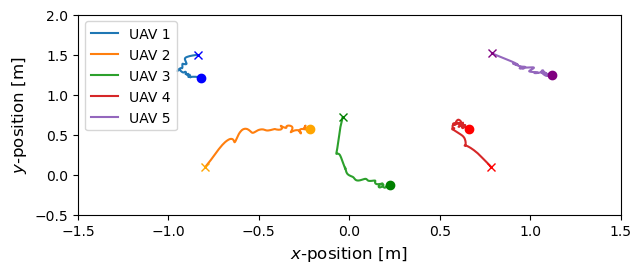

In [48]:
# UAVs' Position in the x-y Plane

PlotXYplane(pos_vel)

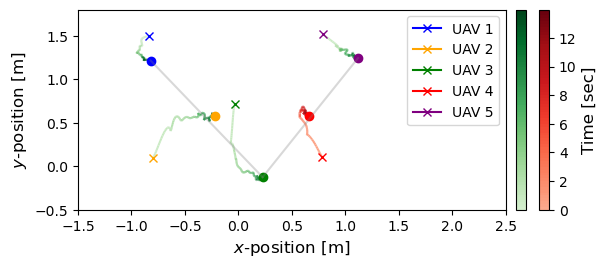

In [50]:
UAV_IDs_x = [0,3,6,9,12] 
plt.rcParams["figure.figsize"] = (7,2.6)

itr_end = itr_landing

for uav_id in UAV_IDs_x:
    
    # t = np.linspace(0,1,x.shape[0]) # your "time" variable
    t_end = itr_landing
    t = T[itr_hover:t_end]-itr_hover*Ts
    
    x   = pos_vel[uav_id,itr_hover:itr_end] 
    y   = pos_vel[uav_id+1,itr_hover:itr_end] 

    # set up a list of (x,y) points
    points = np.array([x,y]).transpose().reshape(-1,1,2)
    # printpoints.shape  # Out: (len(x),1,2)

    # set up a list of segments
    segs = np.concatenate([points[:-1],points[1:]],axis=1)
    # print segs.shape  # Out: ( len(x)-1, 2, 2 )
    #                   # see what we've done here -- we've mapped our (x,y)
    #                   # points to an array of segment start/end coordinates.
    #                   # segs[i,0,:] == segs[i-1,1,:]

    # make the collection of segments

    if uav_id == 9:
        clr = mpl.cm.Reds(np.linspace(0,1,100))
        clr = mpl.colors.ListedColormap(clr[30:,:-1])
    else:
        clr = mpl.cm.Greens(np.linspace(0,1,100))
        clr = mpl.colors.ListedColormap(clr[20:,:-1])
    
    lc = LineCollection(segs, cmap=plt.get_cmap(clr))
    lc.set_array(t) # color the segments by our parameter

    # plot the collection
    plt.gca().add_collection(lc) # add the collection to the plot
    
    plt.ylim([-.5, 1.8])
    plt.xlim([-1.5, 2.5])
    if uav_id == 12:  # the last id to just plot the colorbar once
        plt.colorbar(lc, pad =0.02, ticks=[])
#         plt.set_ticks([])
    if uav_id == 9:  
        plt.colorbar(lc, pad = -.1, label='Time [sec]')
#     plt.colorbar(lc) 


plt.plot(pos_vel[0,itr_hover],pos_vel[1,itr_hover],marker = 'x', color='blue', label=r'UAV 1')
plt.plot(pos_vel[3,itr_hover],pos_vel[4,itr_hover], marker = 'x', color='orange', label=r'UAV 2')
plt.plot(pos_vel[6,itr_hover],pos_vel[7,itr_hover], marker = 'x', color='green', label=r'UAV 3')
plt.plot(pos_vel[9,itr_hover],pos_vel[10,itr_hover], marker = 'x', color='red', label=r'UAV 4')
plt.plot(pos_vel[12,itr_hover],pos_vel[13,itr_hover], marker = 'x', color='purple', label=r'UAV 5')
#
plt.plot(pos_vel[0,t_end],pos_vel[1,t_end], marker = 'o', color='blue')
plt.plot(pos_vel[3,t_end],pos_vel[4,t_end], marker = 'o', color='orange')
plt.plot(pos_vel[6,t_end],pos_vel[7,t_end], marker = 'o', color='green')
plt.plot(pos_vel[9,t_end],pos_vel[10,t_end], marker = 'o', color='red')
plt.plot(pos_vel[12,t_end],pos_vel[13,t_end], marker = 'o', color='purple')

point1 = [pos_vel[0,t_end], pos_vel[1,t_end]]
point3 = [pos_vel[6,t_end],pos_vel[7,t_end]]
point5 = [pos_vel[12,t_end],pos_vel[13,t_end]]

x_values13 = [point1[0], point3[0]]
y_values13 = [point1[1], point3[1]]

x_values35 = [point3[0], point5[0]]
y_values35 = [point3[1], point5[1]]

plt.plot(x_values13, y_values13, 'gray', alpha = .3)
plt.plot(x_values35, y_values35, 'gray', alpha = .3)
# plt.figsize=(6,1)

plt.xlabel(r'$x$-position [m]')
plt.ylabel(r'$y$-position [m]')
plt.legend()

plt.savefig('{}/{}_XYplane_new.pdf'.format(idxx,idxx), bbox_inches="tight") 

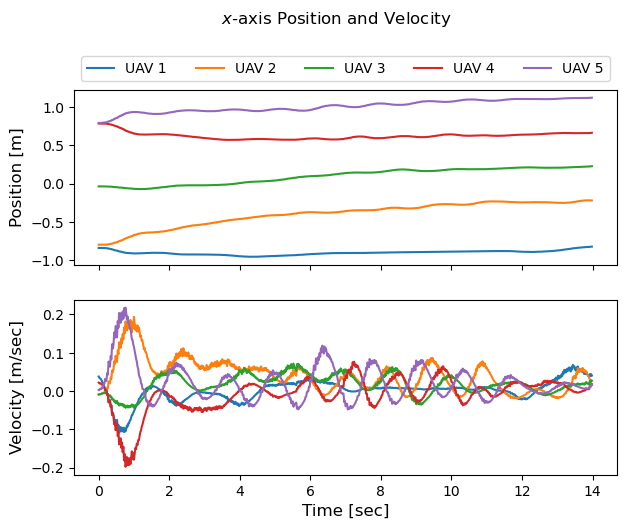

In [51]:
# x-axis Position and velocity

PlotPosVel(pos_vel, FigSize = (7,5), idx=0, t_start = itr_hover, t_end = itr_landing)

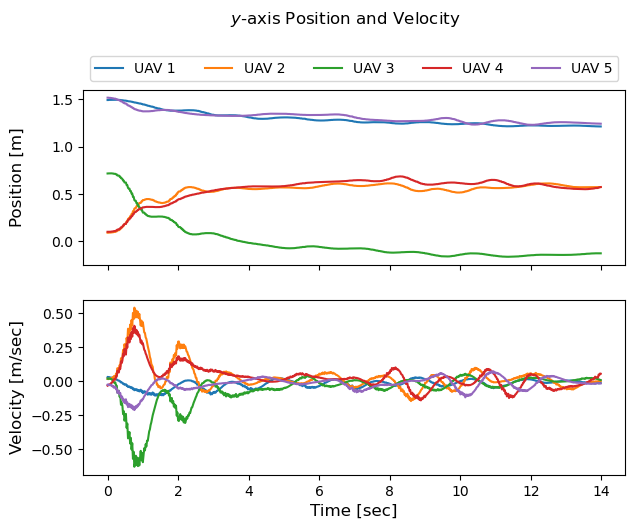

In [52]:
# y-axis Position and velocity

PlotPosVel(pos_vel, FigSize = (7,5), idx=1, t_start = itr_hover, t_end = itr_landing)

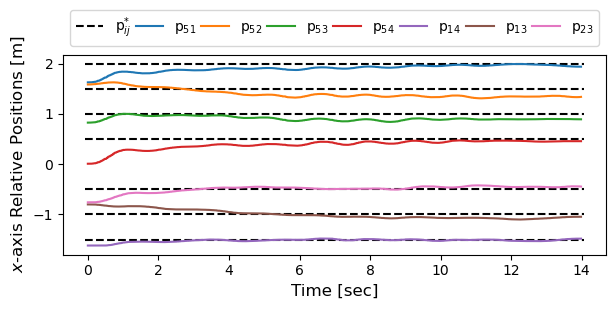

In [53]:
# x-axis Relative Displacement

PlotRelDisp(pos_vel, FigSize = FIGURE_SIZE, idx=0, t_start = itr_hover, t_end = itr_landing)

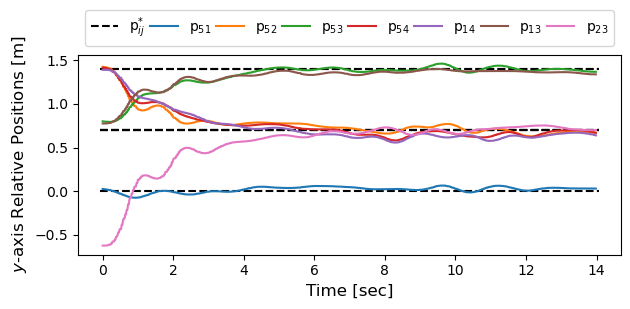

In [54]:
# y-axis Relative Displacement

PlotRelDisp(pos_vel, FigSize = FIGURE_SIZE, idx=1, t_start = itr_hover, t_end = itr_landing)

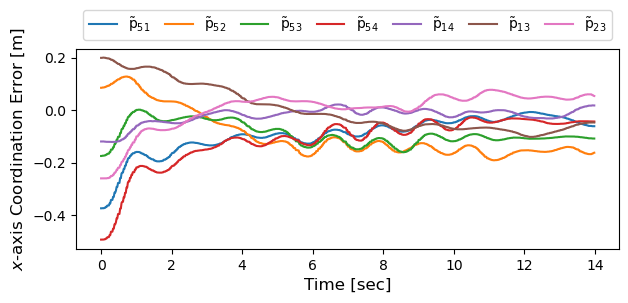

In [55]:
# Coordination Error in x-axis

PlotCoorError(pos_vel, FigSize= FIGURE_SIZE,  idx=0 , t_start = itr_hover, t_end = itr_landing)

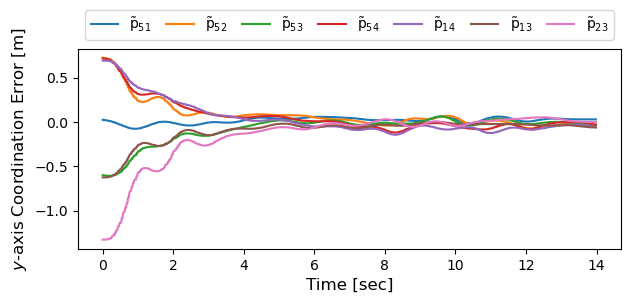

In [56]:
# Coordination Error in y-axis

PlotCoorError(pos_vel, FigSize= FIGURE_SIZE,  idx=1 , t_start = itr_hover, t_end = itr_landing)

### Central Observer Residuals

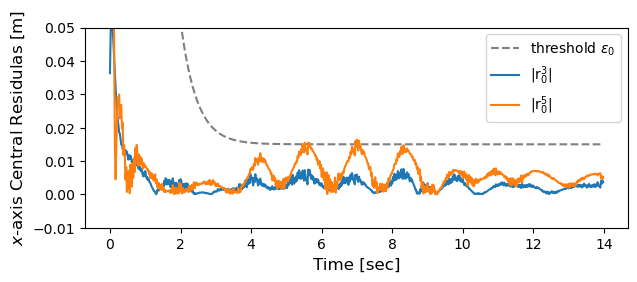

In [20]:
PlotCentralResiduals(pos_vel, FigSize = FIGURE_SIZE, idx=0, t_start = itr_hover, t_end = itr_landing)

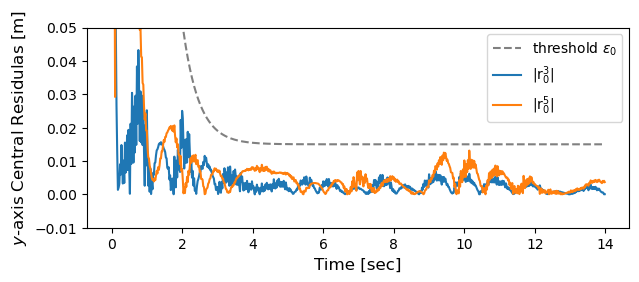

In [21]:
PlotCentralResiduals(pos_vel, FigSize = FIGURE_SIZE, idx=1, t_start = itr_hover, t_end = itr_landing)

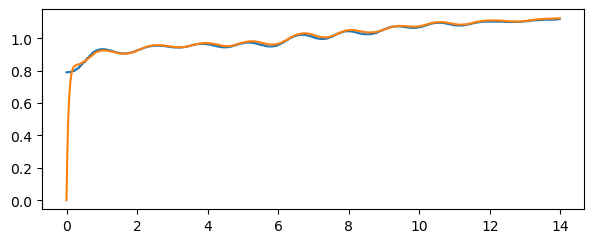

In [22]:
t_start = itr_hover
t_end = itr_landing
plt.plot(T[t_start:t_end]-t_start*Ts,pos_vel[12,t_start:t_end], label=r'UAV 5')
plt.plot(T[t_start:t_end]-t_start*Ts,Yhat_CentObs_x[1,t_start:t_end])


### Local Observers' Residuals

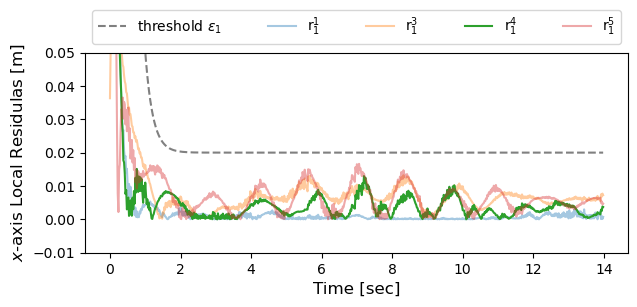

In [23]:
threshold = 3*np.exp(-4.6*(T[itr_hover:itr_landing]-t_start*Ts)) + 0.02

plt.plot(T[t_start:t_end]-t_start*Ts, threshold, '--', color='gray', label = r'threshold $\epsilon_{1}$')
# rest
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_x[0, t_start:t_end]), alpha =0.4, label = r'$\mathrm{r}_{1}^{1}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_x[1, t_start:t_end]), alpha =0.4, label = r'$\mathrm{r}_{1}^{3}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_x[2, t_start:t_end]), label = r'$\mathrm{r}_1^{4}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_x[3, t_start:t_end]), alpha =0.4, label = r'$\mathrm{r}_{1}^{5}$')
#
# plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_y[4, t_start:t_end]))
plt.ylim([-.01, .05])
plt.xlabel('Time [sec]')
plt.ylabel('$x$-axis Local Residulas [m]') 
plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), ncol=5, mode='expand', loc='lower left')

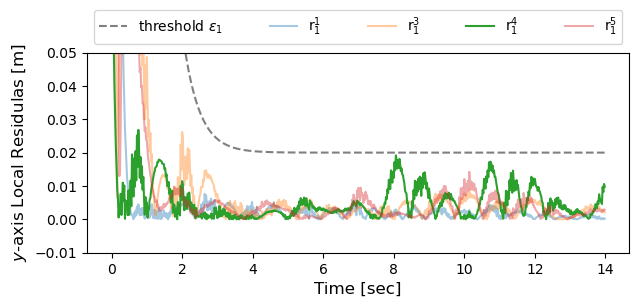

In [24]:
threshold_y = 3*np.exp(-2.2*(T[itr_hover:itr_landing]-t_start*Ts)) + 0.02
plt.plot(T[t_start:t_end]-t_start*Ts, threshold_y, '--', color='gray', label = r'threshold $\epsilon_{1}$')
# rest
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_y[0, t_start:t_end]), alpha =0.4, label = r'$\mathrm{r}_{1}^{1}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_y[1, t_start:t_end]), alpha =0.4, label = r'$\mathrm{r}_{1}^{3}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_y[2, t_start:t_end]), label = r'$\mathrm{r}_1^{4}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_y[3, t_start:t_end]), alpha =0.4, label = r'$\mathrm{r}_{1}^{5}$')
#
# plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_1_y[4, t_start:t_end]))
plt.ylim([-.01, .05])
plt.xlabel('Time [sec]')
plt.ylabel('$y$-axis Local Residulas [m]') 
plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), ncol=5, mode='expand', loc='lower left')

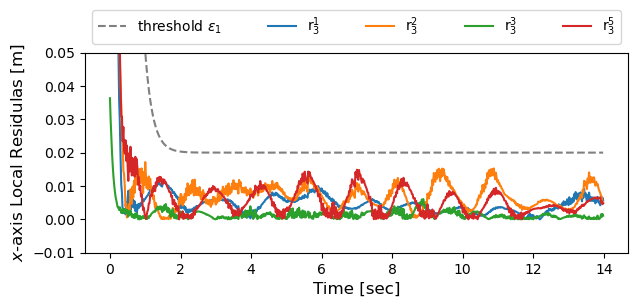

In [25]:
threshold = 3*np.exp(-4.6*(T[itr_hover:itr_landing]-t_start*Ts)) + 0.02

plt.plot(T[t_start:t_end]-t_start*Ts, threshold, '--', color='gray', label = r'threshold $\epsilon_{1}$')
# rest
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_x[0, t_start:t_end]), label = r'$\mathrm{r}_{3}^{1}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_x[1, t_start:t_end]), label = r'$\mathrm{r}_{3}^{2}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_x[2, t_start:t_end]), label = r'$\mathrm{r}_{3}^{3}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_x[3, t_start:t_end]), label = r'$\mathrm{r}_{3}^{5}$')
#
# plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_y[4, t_start:t_end]))
plt.ylim([-.01, .05])
plt.xlabel('Time [sec]')
plt.ylabel('$x$-axis Local Residulas [m]') 
plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), ncol=5, mode='expand', loc='lower left')

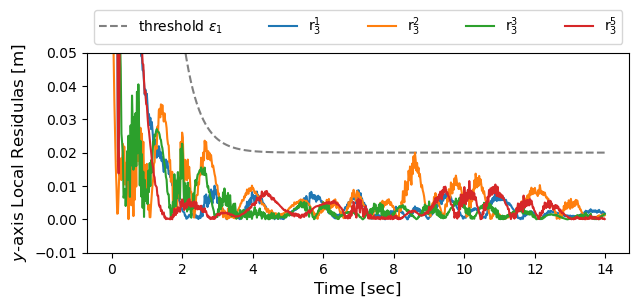

In [26]:
threshold_y = 3*np.exp(-2.2*(T[itr_hover:itr_landing]-t_start*Ts)) + 0.02
plt.plot(T[t_start:t_end]-t_start*Ts, threshold_y, '--', color='gray', label = r'threshold $\epsilon_{1}$')
# rest
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_y[0, t_start:t_end]), label = r'$\mathrm{r}_{3}^{1}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_y[1, t_start:t_end]), label = r'$\mathrm{r}_{3}^{2}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_y[2, t_start:t_end]), label = r'$\mathrm{r}_{3}^{3}$')
plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_y[3, t_start:t_end]), label = r'$\mathrm{r}_{3}^{5}$')
#
# plt.plot(T[t_start:t_end]-t_start*Ts, abs(res_locObs_3_y[4, t_start:t_end]))
plt.ylim([-.01, .05])
plt.xlabel('Time [sec]')
plt.ylabel('$y$-axis Local Residulas [m]') 
plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), ncol=5, mode='expand', loc='lower left')

### ZDA: neutral switching for detection